<a href="https://colab.research.google.com/github/anushri1jain/Machine-Condition-Monitoring/blob/Anushri/Anushri_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN Model Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 8, 32)             64        
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 8, 32)             0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 4, 64)             6208      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 4, 64)             0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 2, 64)            0         
 1D)                                

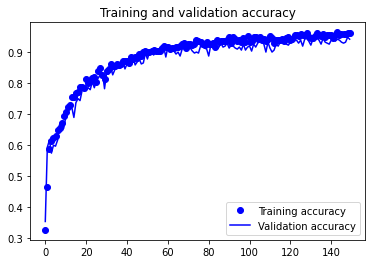

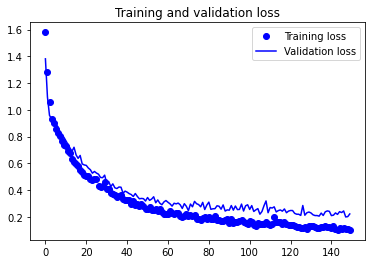

In [16]:
import os
import pandas as pd
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from tensorflow import keras
from sklearn import preprocessing
from numpy.random import seed
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import Sequential
from keras.models import model_from_json
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers import LayerNormalization
from keras.layers.advanced_activations import LeakyReLU

merged_data = pd.read_csv('dataset_6classses_rms.csv')
merged_data = merged_data.drop(merged_data.columns[0], axis = 1)

num_cols = ['Bearing 1']
merged_data.columns = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2', 'FaultType']
merged_data.reset_index(drop=True, inplace=True)
merged_data.to_csv('Imb1.csv')
num_cols = ['Bearing 1-1','Bearing 1-2','Bearing 2-1','Bearing 2-2', 'Bearing 3-1','Bearing 3-2','Bearing 4-1','Bearing 4-2']

dataset_train = merged_data #['2004-02-12 11:02:39':'2004-02-13 23:52:39']

dataset = merged_data.values
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]


warnings.filterwarnings("ignore")

# encode class values as integers
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

# NN parameters 
batch_size = 64
epochs = 150
num_classes = 6

# preparing input data
data_label = to_categorical(Y)
data = np.expand_dims(X, axis=-1)

# spliting train, validation and training data
train_X_full, test_X, train_label_full, test_label = train_test_split(data, data_label, test_size=0.2, random_state=13)
train_X, valid_X, train_label, valid_label = train_test_split(train_X_full, train_label_full, test_size=0.2, random_state=13)

n_features = train_X.shape[1]
n_timestamp = train_X.shape[0]

# preparing CNN model
CNN_model = Sequential()
CNN_model.add(Conv1D(filters = 32, kernel_size=1,activation='linear', input_shape= (n_features, 1), padding='same'))
CNN_model.add(LeakyReLU(alpha=0.1))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Conv1D(filters = 64, kernel_size=3, activation='linear',padding='same'))
CNN_model.add(LeakyReLU(alpha=0.1))
CNN_model.add(MaxPooling1D(pool_size=(2),padding='same'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Conv1D(filters = 128, kernel_size=3, activation='linear',padding='same'))
CNN_model.add(LeakyReLU(alpha=0.1))                  
CNN_model.add(MaxPooling1D(pool_size=2,padding='same'))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='linear'))
CNN_model.add(LeakyReLU(alpha=0.1))                  
CNN_model.add(Dense(num_classes, activation='softmax'))

CNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['acc'])
print('CNN Model Summary')
CNN_model.summary()

# training the model
CNN_train = CNN_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,validation_data=(valid_X, valid_label),verbose=1)

# evaluating on test data
train_eval = CNN_model.evaluate(test_X, test_label, verbose=0)
print('Test loss:', train_eval[0])
print('Test accuracy:', train_eval[1])

# plot the results
accuracy = CNN_train.history['acc']
val_accuracy = CNN_train.history['val_acc']
loss = CNN_train.history['loss']
val_loss = CNN_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()